In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
hour_df = pd.read_csv("hour.csv")

## Task 1: Data Loading and Initial Exploration

In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hour_df.rename(columns={'instant':'id',
                        'dteday':'date',
                        'yr':'year',
                        'mnth':'month',
                        'hr':'hour',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'cnt':'count'},inplace=True)

hour_df['date'] = pd.to_datetime(hour_df.date)

hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather'] = hour_df.weather.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')




In [5]:
hour_df.head()

,id,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
#Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

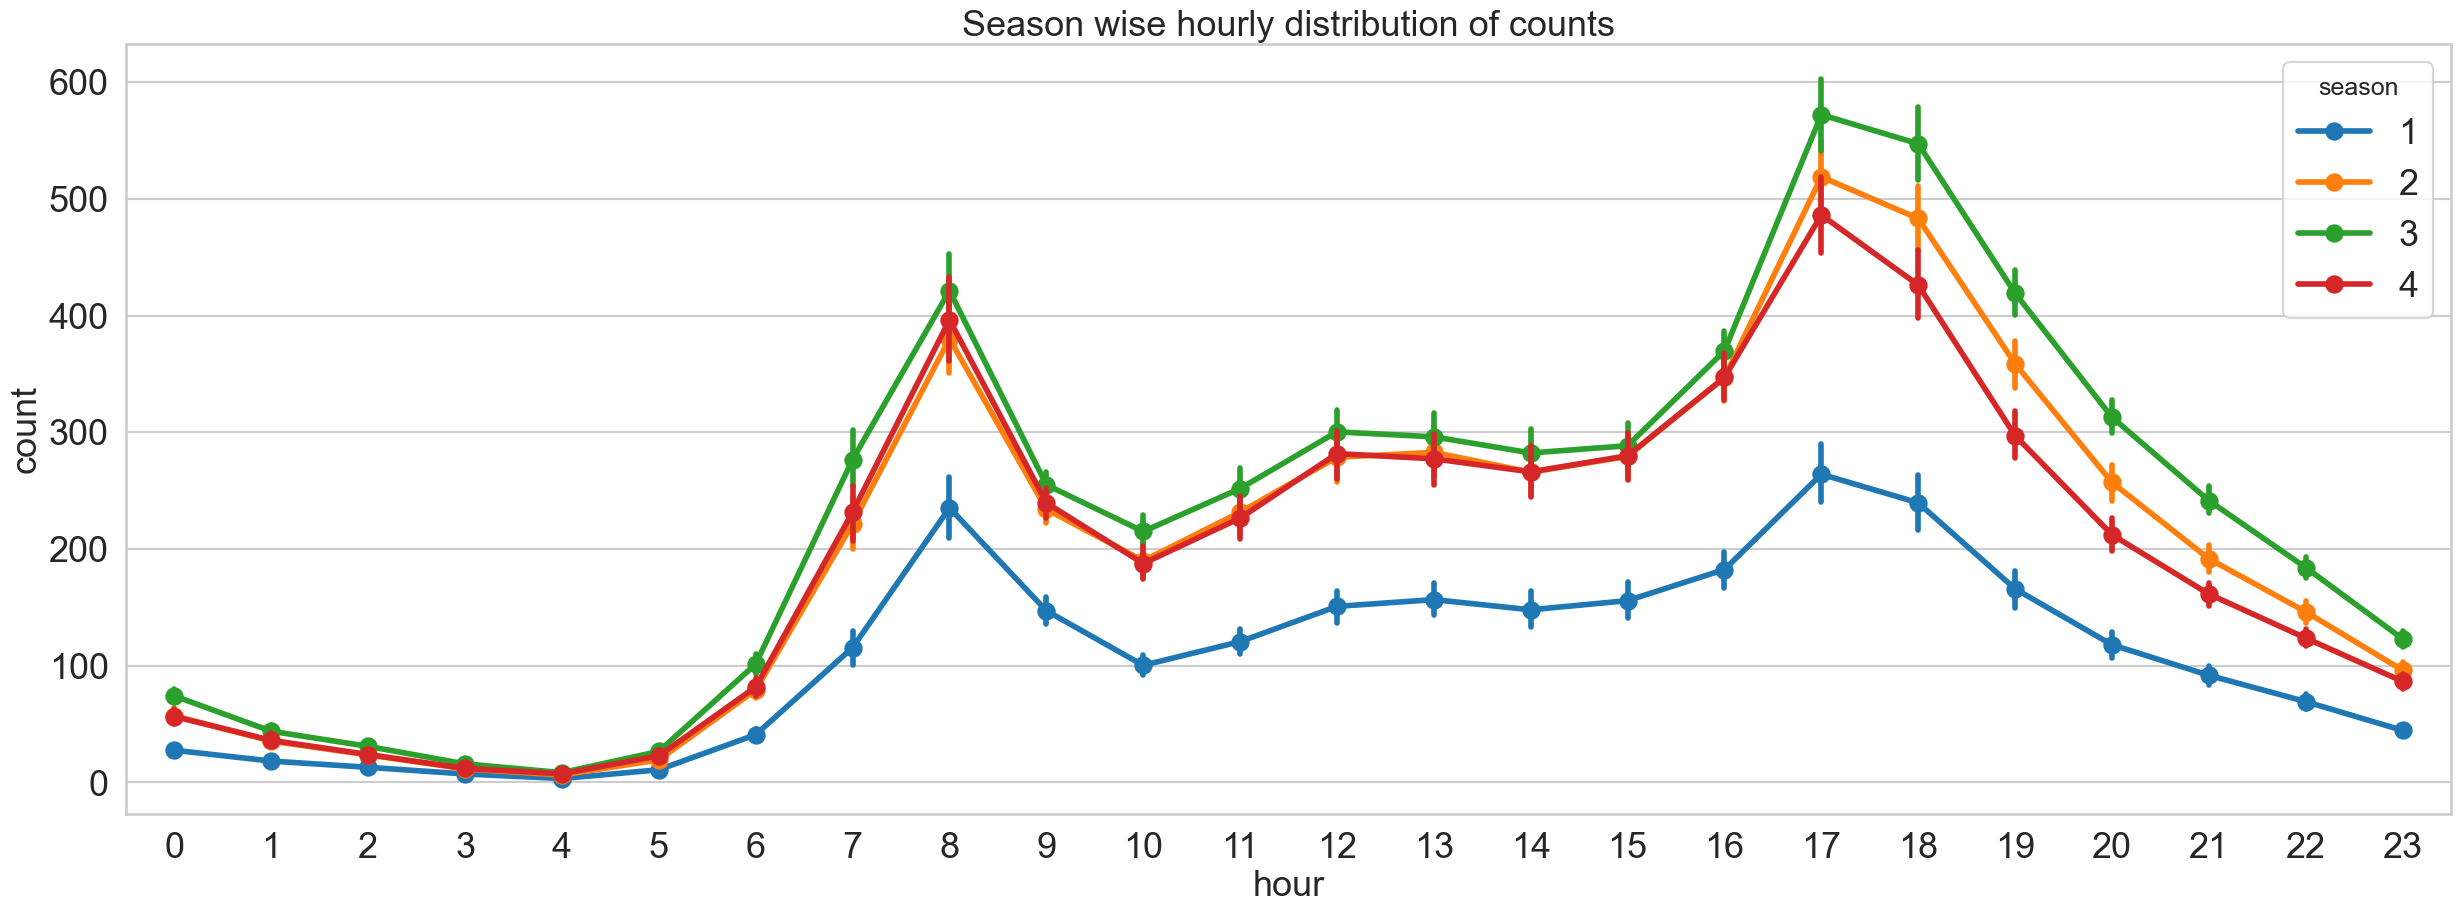

In [7]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'count',
                           'season']],
              x='hour',
              y='count',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

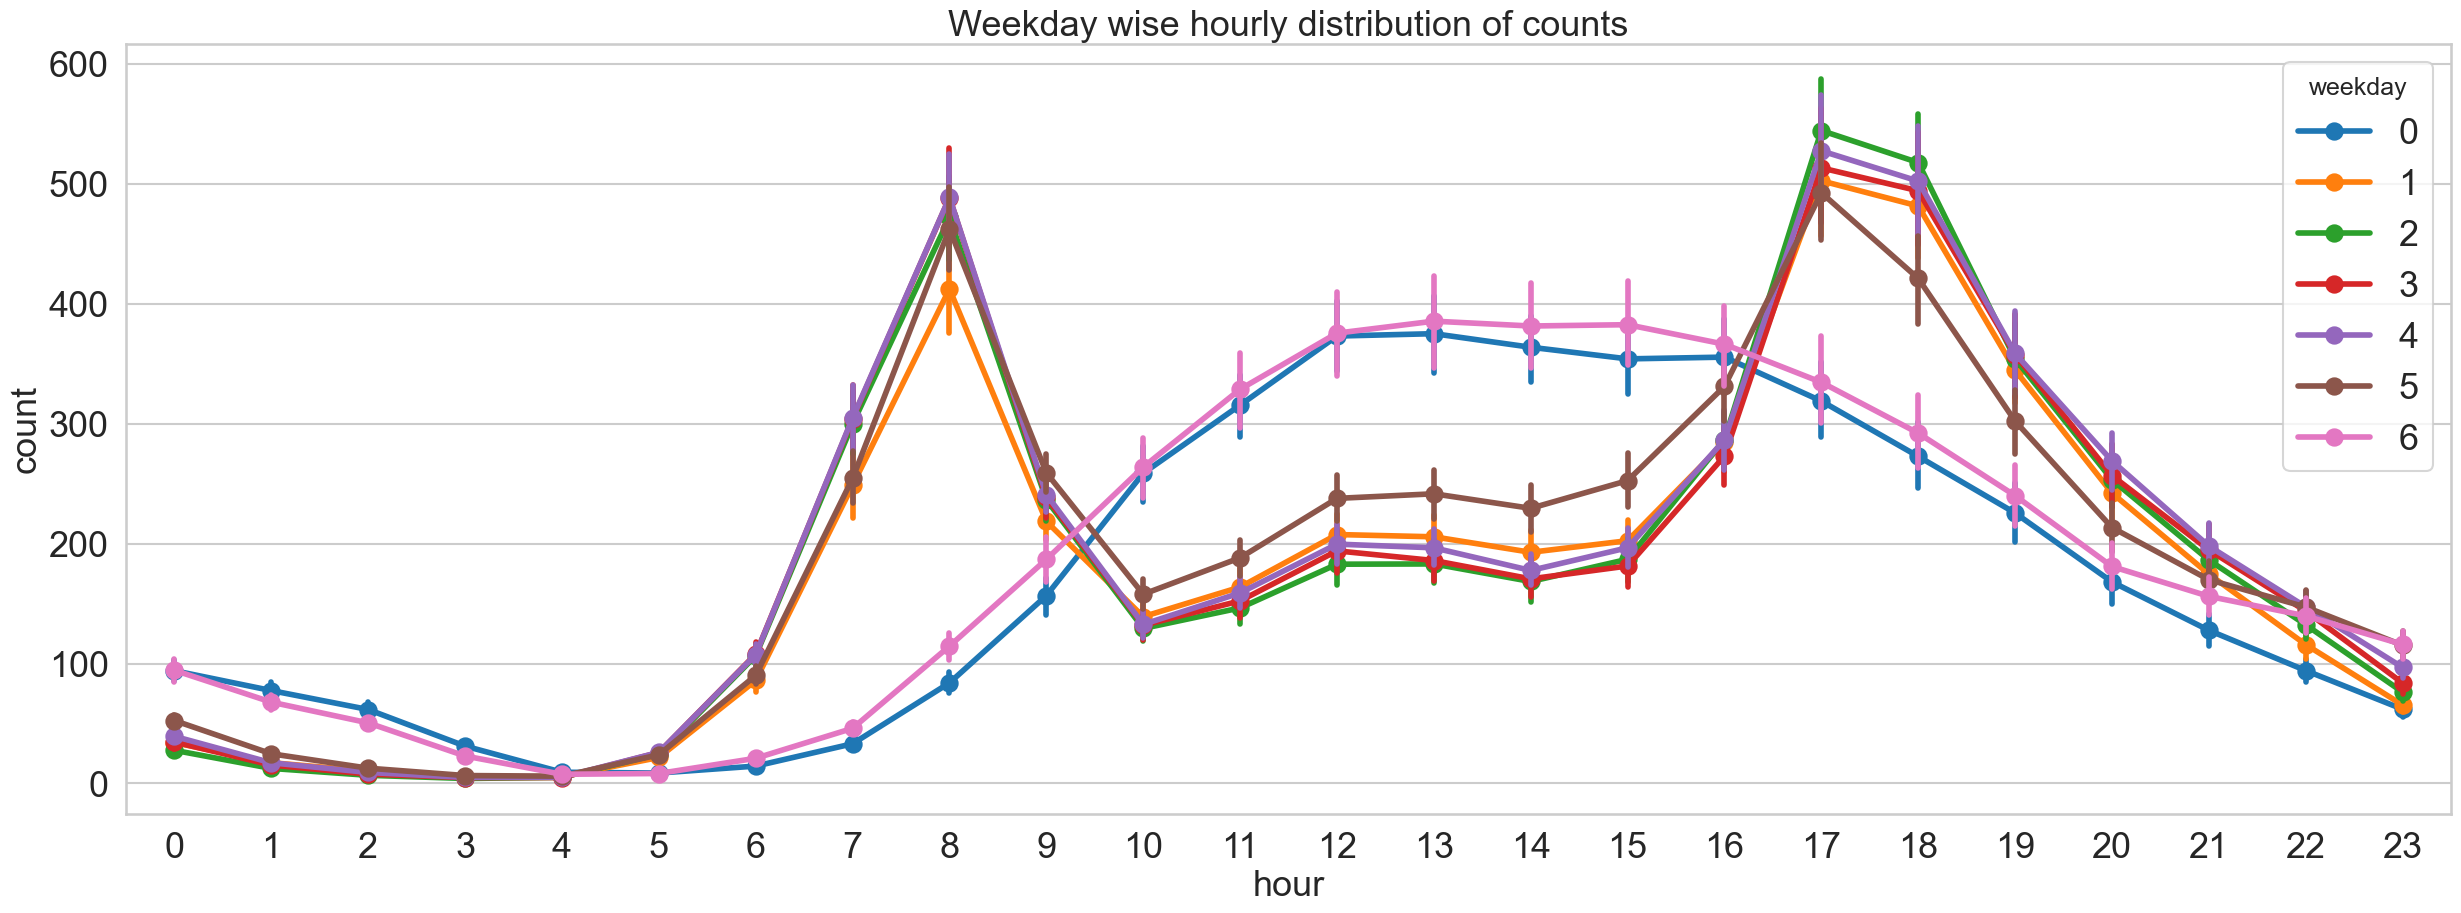

In [8]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'count',
                           'weekday']],
              x='hour',
              y='count',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

[Text(0.5, 1.0, 'Monthly distribution of counts')]

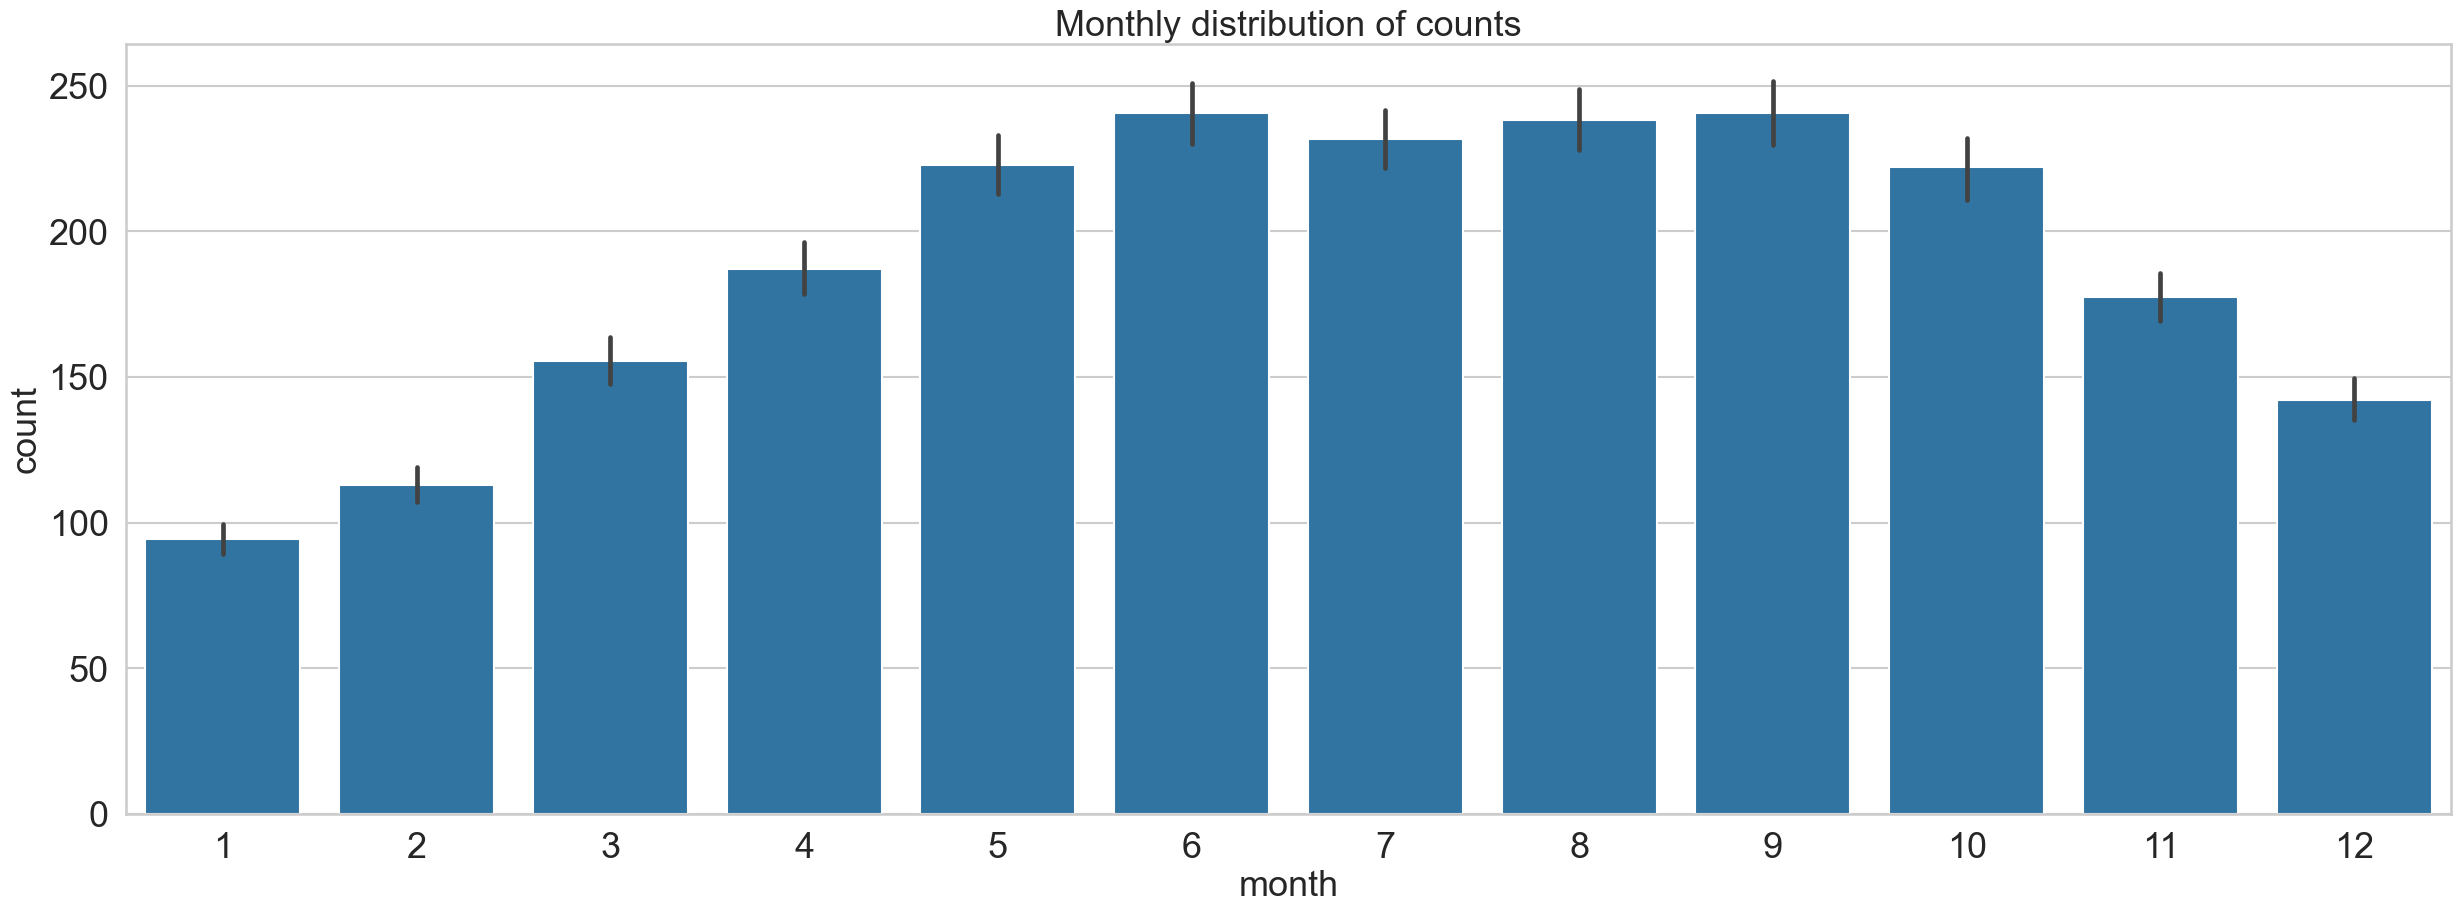

In [9]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['month',
                           'count']],
              x='month',
              y='count',
              ax=ax)
ax.set(title="Monthly distribution of counts")

[Text(0.5, 1.0, 'Seasonal distribution of counts')]

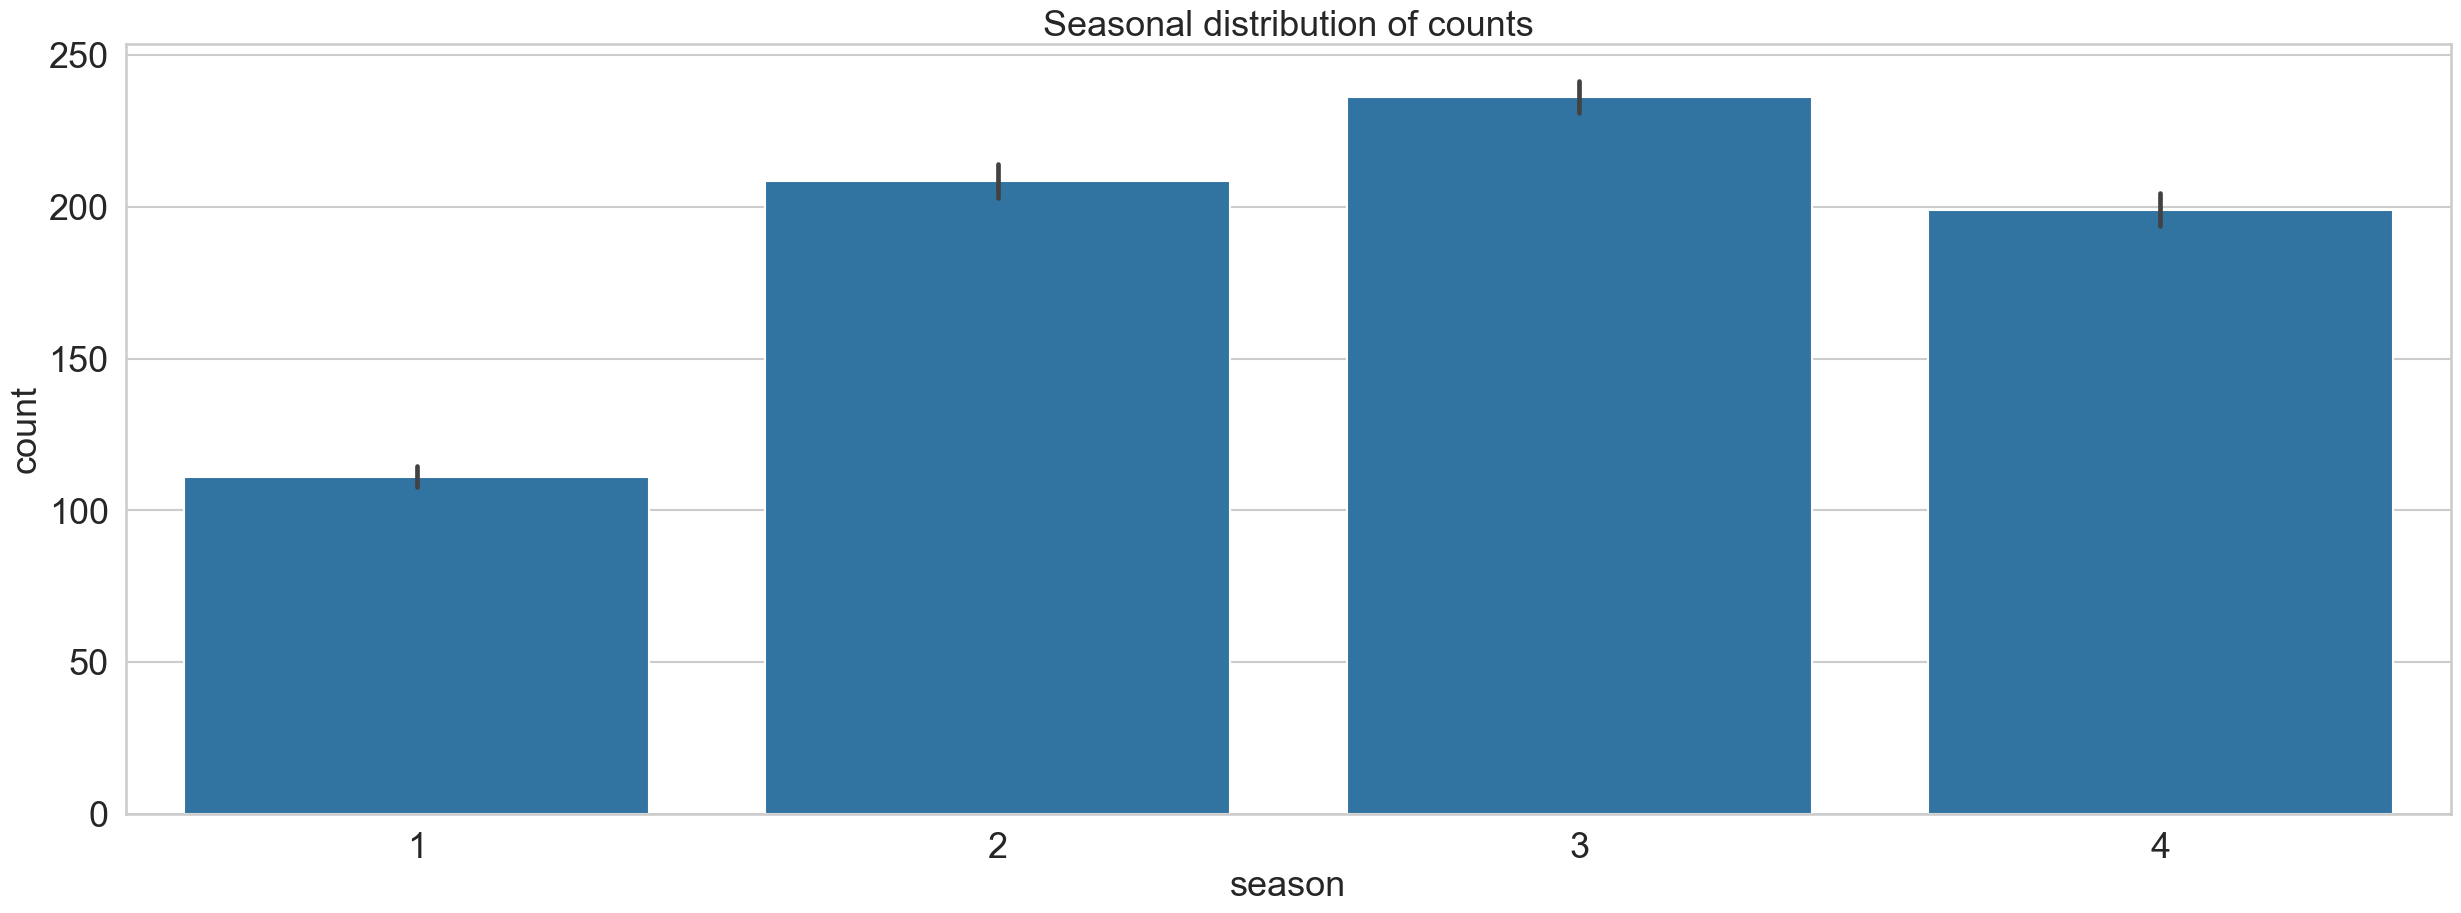

In [10]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['season',
                           'count']],
              x='season',
              y='count',
              ax=ax)
ax.set(title="Seasonal distribution of counts")

[Text(0.5, 1.0, 'Year distribution of counts')]

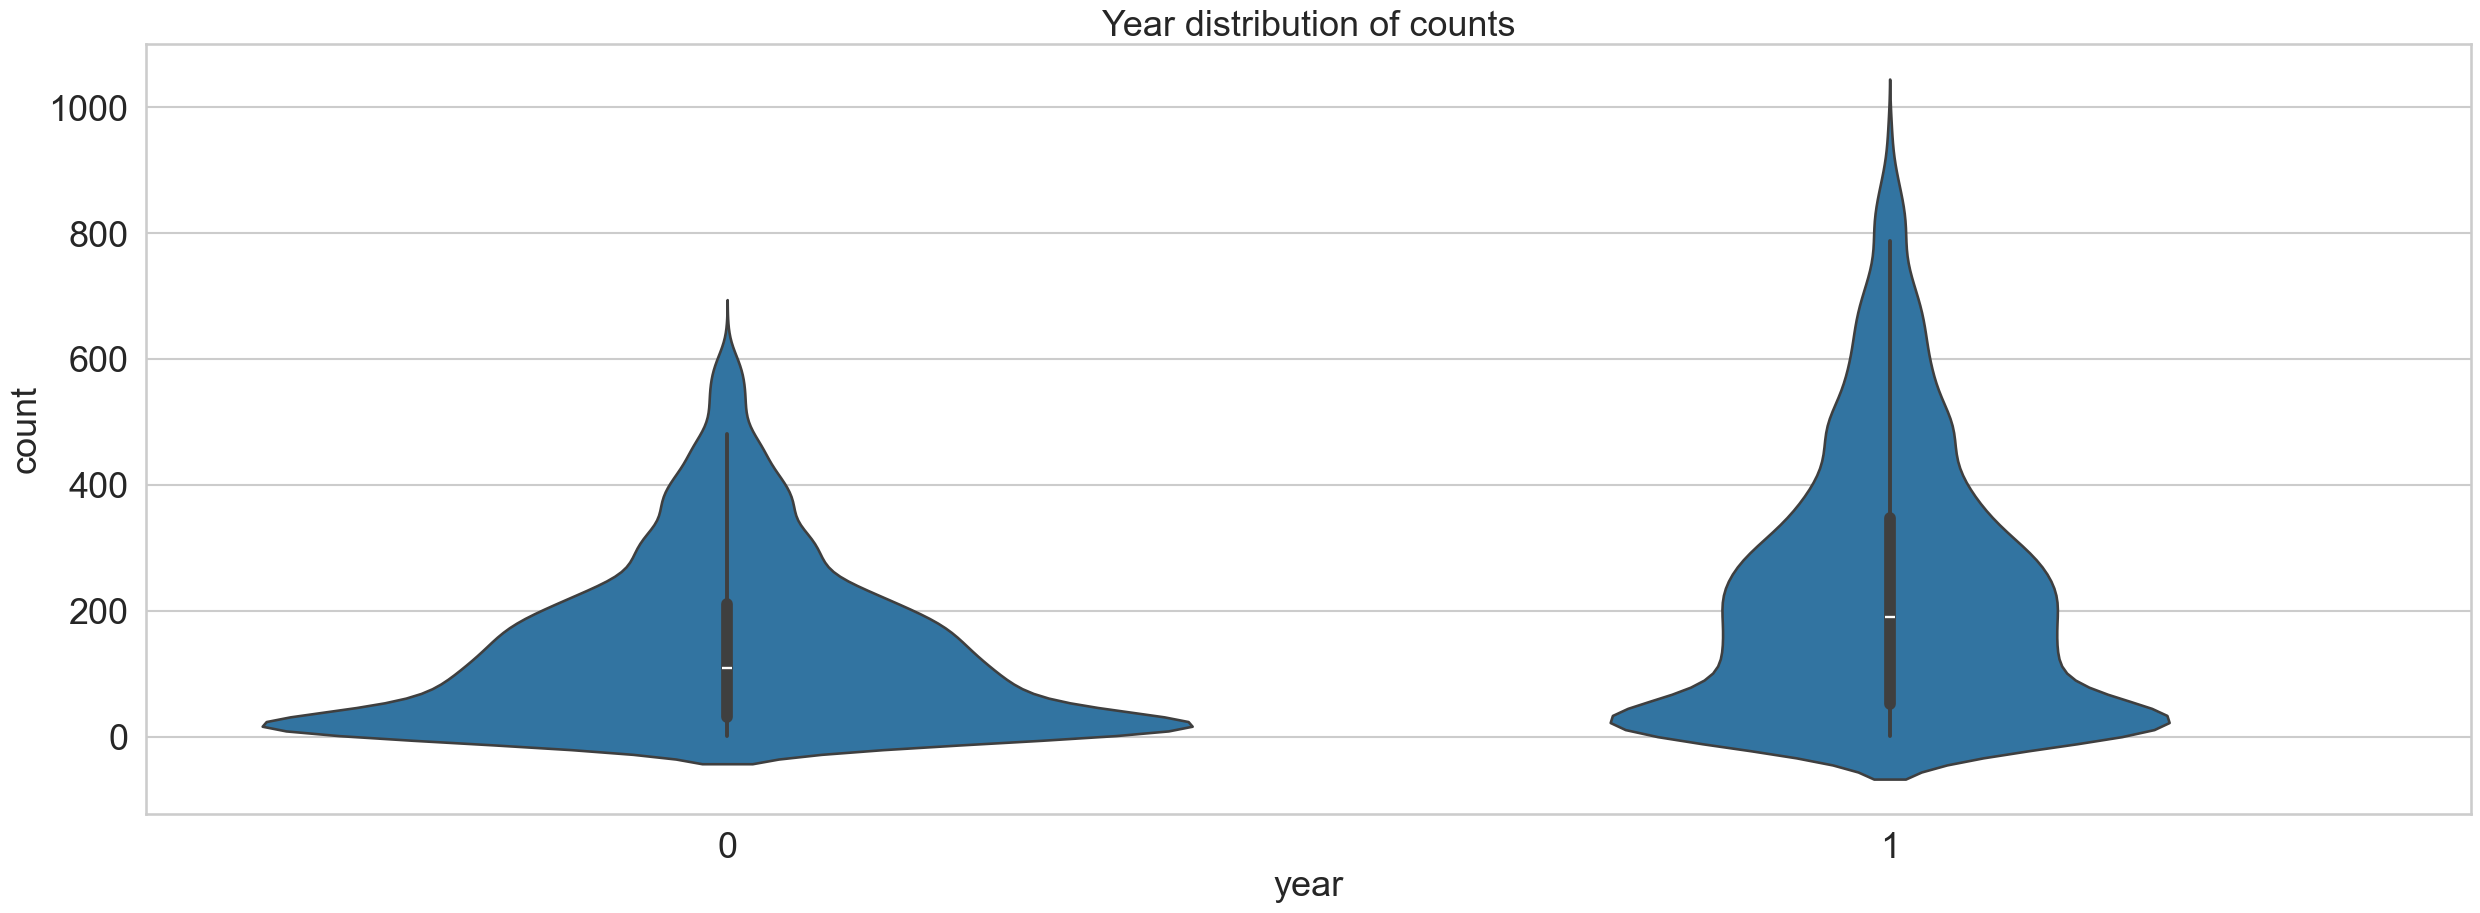

In [11]:
fig,ax = plt.subplots()
sns.violinplot(data=hour_df[['year',
                           'count']],
              x='year',
              y='count',
              ax=ax)
ax.set(title="Year distribution of counts")

<Axes: >

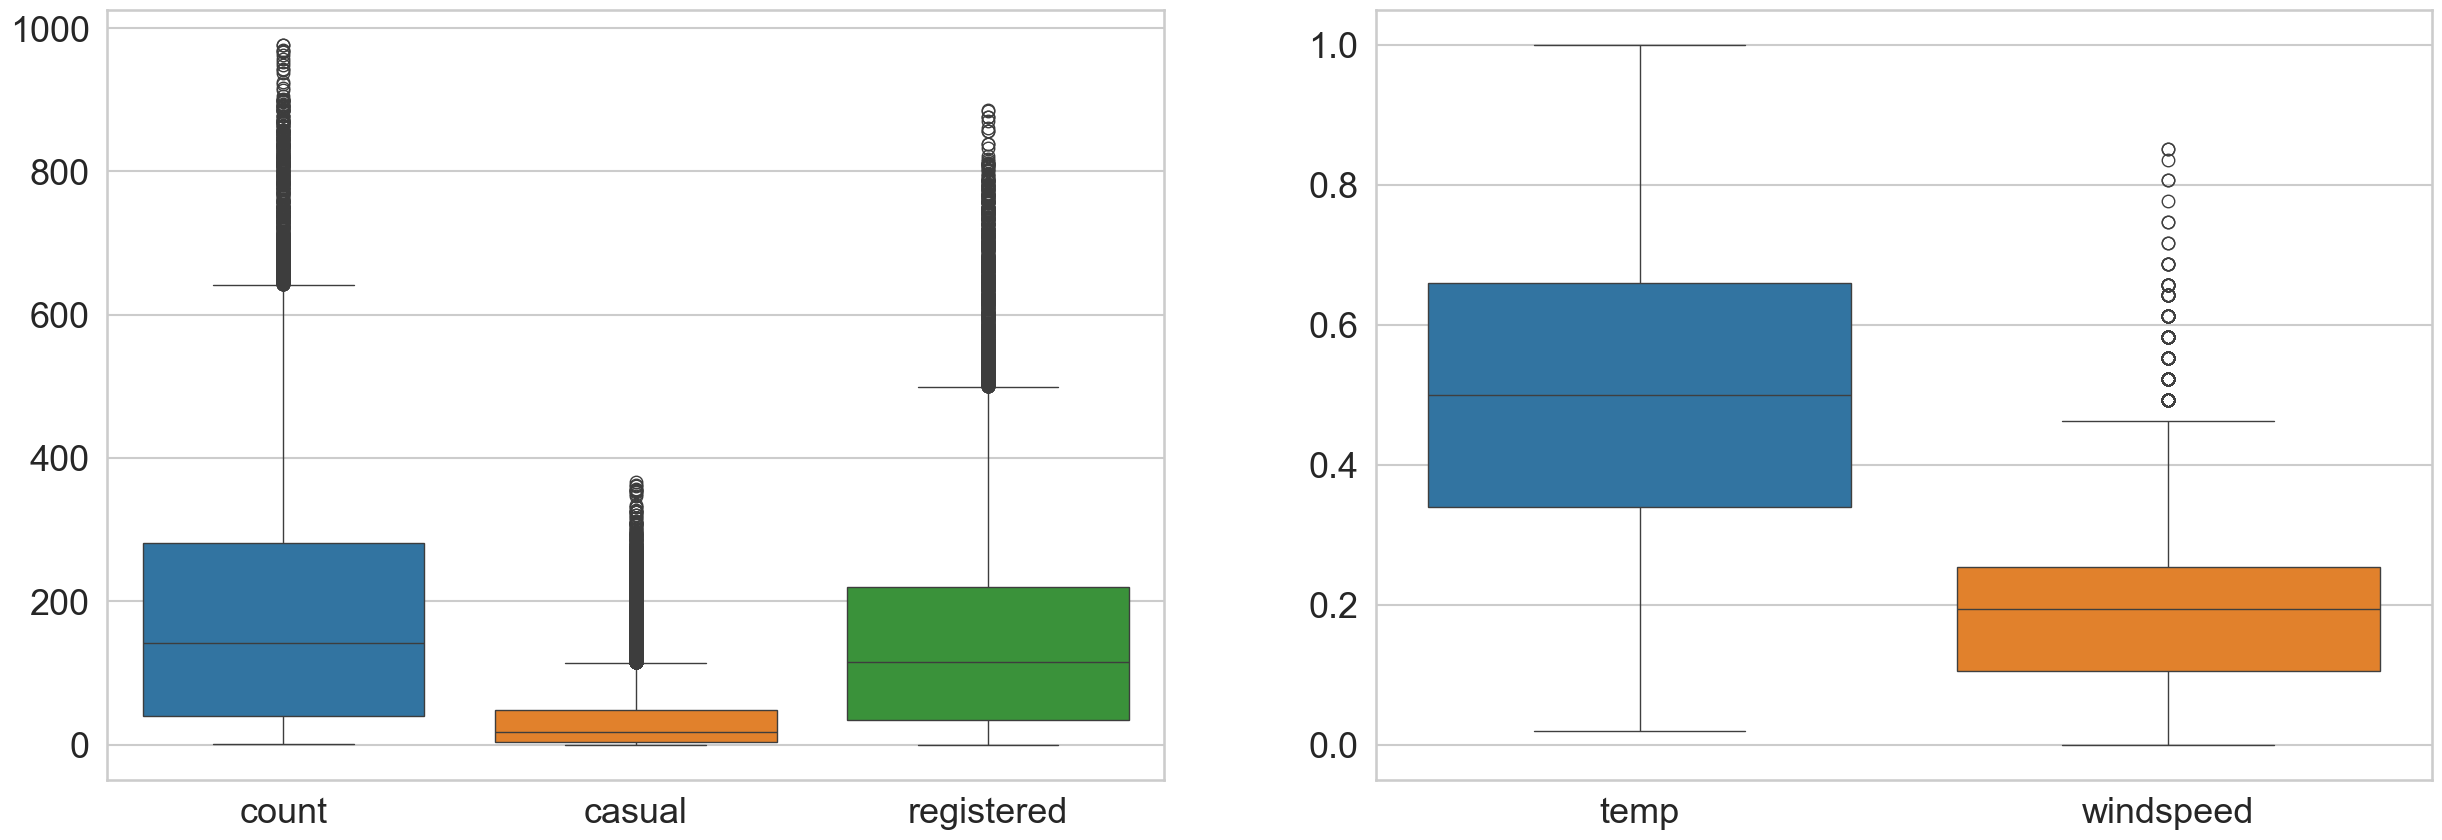

In [12]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=hour_df[['count',
                          'casual',
                          'registered']],ax=ax1)
sns.boxplot(data=hour_df[['temp',
                          'windspeed']],ax=ax2)

[Text(0.5, 1.0, 'Checking for outliners in day hours')]

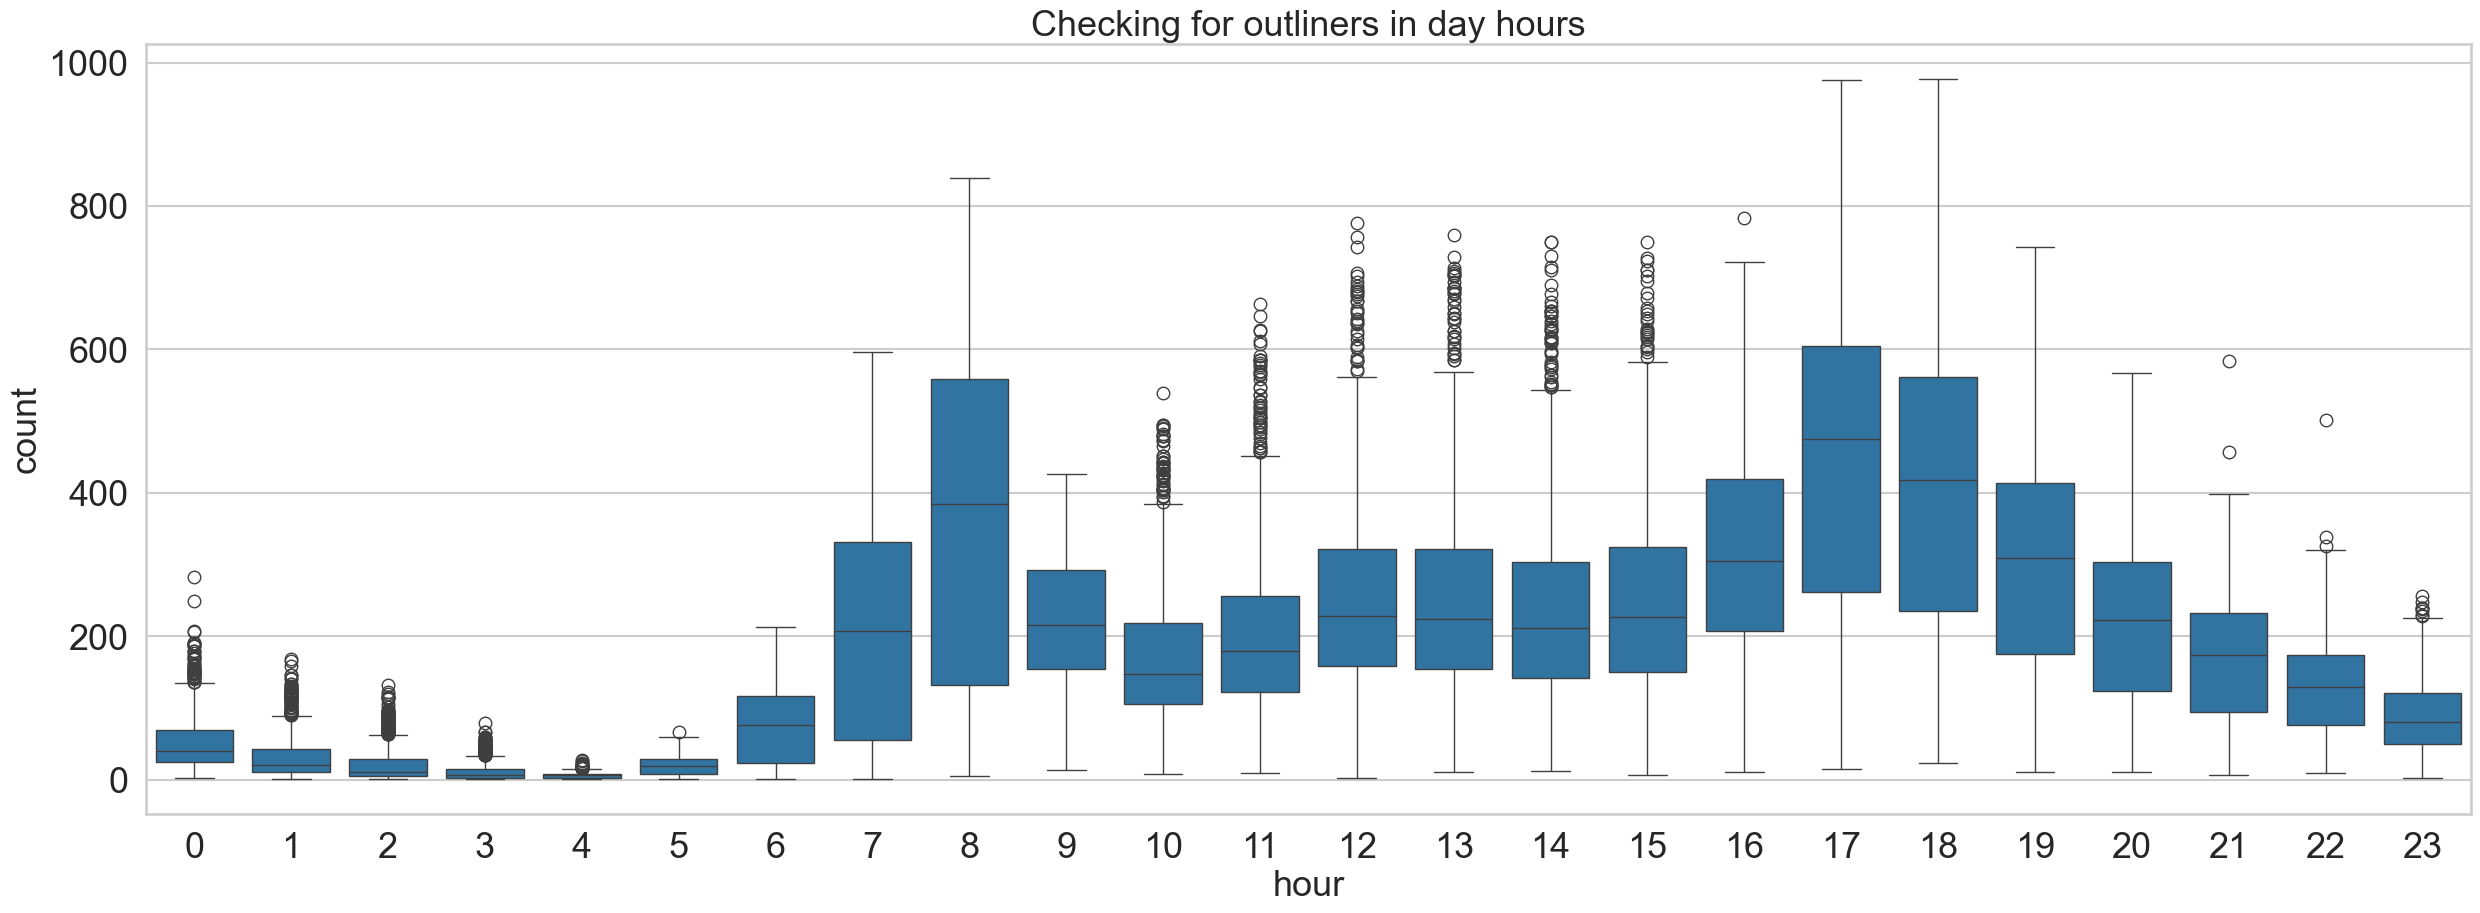

In [13]:
fig,ax = plt.subplots()
sns.boxplot(data=hour_df[['count',
                          'hour']],x='hour',y='count',ax=ax)
ax.set(title="Checking for outliners in day hours")

<Axes: >

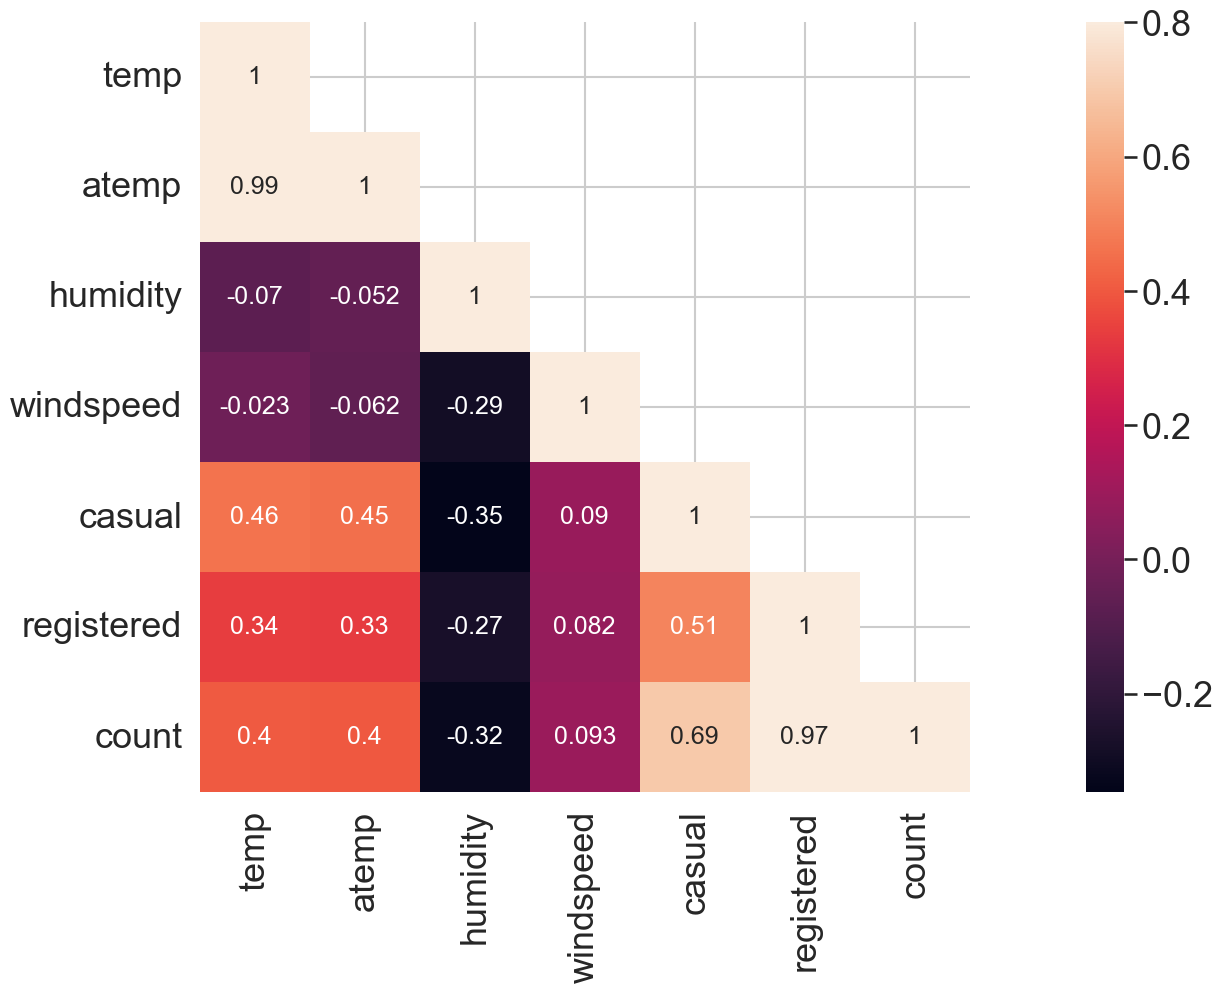

In [14]:
corrMatt = hour_df[['temp',
                'atemp', 
                'humidity', 
                'windspeed', 
                'casual', 
                'registered', 
                'count']].corr()

mask = np.triu(np.ones_like(corrMatt), k=1).astype(bool)
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

drop atemp

In [15]:
hour_df = hour_df.drop(columns=['atemp'])
hour_df.head()

,id,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather,temp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1


### 1. Pearson Correlation Analysis

In [29]:
    # Select numeric columns
correlations = hour_df[['temp','humidity','windspeed','count']].corr()['count'].drop('count')
    
# Print correlations with target variable
print(correlations)

temp         0.404772
humidity    -0.322911
windspeed    0.093234
Name: count, dtype: float64


### 2. Mutual Information Analysis


In [17]:
# Convert datetime column to numeric timestamp first
hour_df['date'] = pd.to_numeric(hour_df['date'])

# Handle categorical features by encoding them
categorical_cols = ['season', 'year', 'month', 'hour', 'weekday', 'weather', 'is_holiday', 'is_workingday']
encoded_hour_df = hour_df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    encoded_hour_df[col] = le.fit_transform(encoded_hour_df[col])

# Separate features (X) and target (y)
X = encoded_hour_df.drop('count', axis=1)
y = encoded_hour_df['count']

# Calculate mutual information
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("\nMutual Information with 'count':")
print(mi_scores)


Mutual Information with 'count':
registered       2.261012
casual           0.739449
hour             0.623354
id               0.160603
date             0.144818
temp             0.140971
humidity         0.100801
month            0.079774
season           0.060758
year             0.049339
weather          0.018201
is_workingday    0.015920
weekday          0.015654
windspeed        0.014070
is_holiday       0.000000
dtype: float64


### 3. Chi2

In [32]:
# Create a contingency table
contingency_table = pd.crosstab(hour_df['weather'], hour_df['season'])

# Perform the Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square test between 'season' and 'weather':")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")


Chi-square test between 'season' and 'weather':
Chi2 Statistic: 168.67912163587522
P-value: 1.1626263980984891e-31


### 4. ANOVA

In [19]:
def anova_test(df, categorical_col, target_col='count'):
    groups = df.groupby(categorical_col)[target_col].apply(list)
    f_statistic, p_value = f_oneway(*groups)
    print(f"\nANOVA F-test for '{target_col}' vs '{categorical_col}':")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")

categorical_features = ['season', 'year', 'month', 'hour', 'weekday', 'weather', 'is_holiday', 'is_workingday']
for col in categorical_features:
    anova_test(hour_df, col)


ANOVA F-test for 'count' vs 'season':
F-statistic: 409.1810372630525
P-value: 7.40107139971279e-257

ANOVA F-test for 'count' vs 'year':
F-statistic: 1163.3651667050667
P-value: 7.213184208630547e-247

ANOVA F-test for 'count' vs 'month':
F-statistic: 128.1021897089323
P-value: 5.505684936484358e-284

ANOVA F-test for 'count' vs 'hour':
F-statistic: 759.0862809702604
P-value: 0.0

ANOVA F-test for 'count' vs 'weekday':
F-statistic: 3.487790047928153
P-value: 0.0018990310434746603

ANOVA F-test for 'count' vs 'weather':
F-statistic: 127.17386949967266
P-value: 1.7347820521802623e-81

ANOVA F-test for 'count' vs 'is_holiday':
F-statistic: 16.636980484977737
P-value: 4.546168948722016e-05

ANOVA F-test for 'count' vs 'is_workingday':
F-statistic: 15.95182279420313
P-value: 6.524264547054267e-05


/var/folders/qz/x2_8w011543gtsdb396j2yj00000gn/T/ipykernel_79505/3856228460.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(categorical_col)[target_col].apply(list)


### 5. VIF

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features (including potentially correlated ones)
numerical_features_vif = hour_df[['temp', 'humidity', 'windspeed']]

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features_vif.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features_vif.values, i) for i in range(numerical_features_vif.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
     feature       VIF
0       temp  5.251163
1   humidity  4.834319
2  windspeed  2.697280


In [37]:
hour_df.drop(columns=['date','id','casual','registered'],inplace=True)
hour_df.head()

TODO LATER:
look at anomalies, suspicions, etc

# 2. Data splitting

In [39]:
hour_df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather,temp,humidity,windspeed,count
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1
